In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics, preprocessing
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import matplotlib
from torch.utils.data import Dataset, DataLoader
matplotlib.rcParams['figure.figsize'] = (15.0, 7.0)

Text(0.5, 1.0, '$ y=cos^2(x) $')

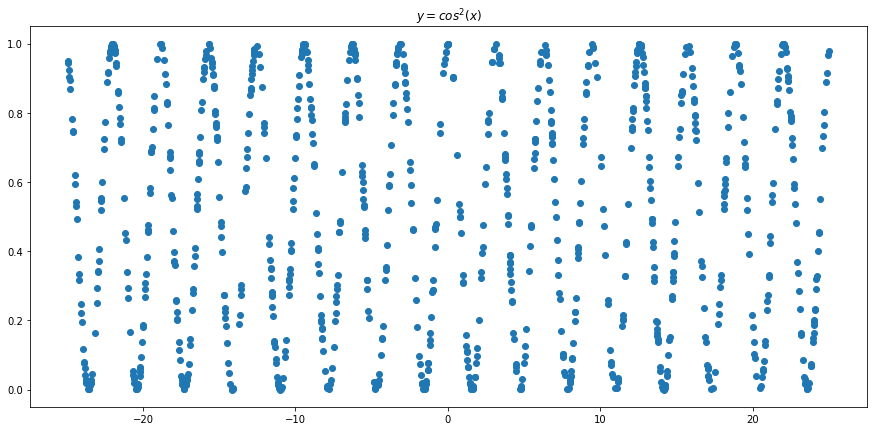

In [2]:
x_train = torch.rand(1000)
x_train = x_train*50.0 - 25.0

y_train = torch.cos(x_train)**2

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$ y=cos^2(x) $')

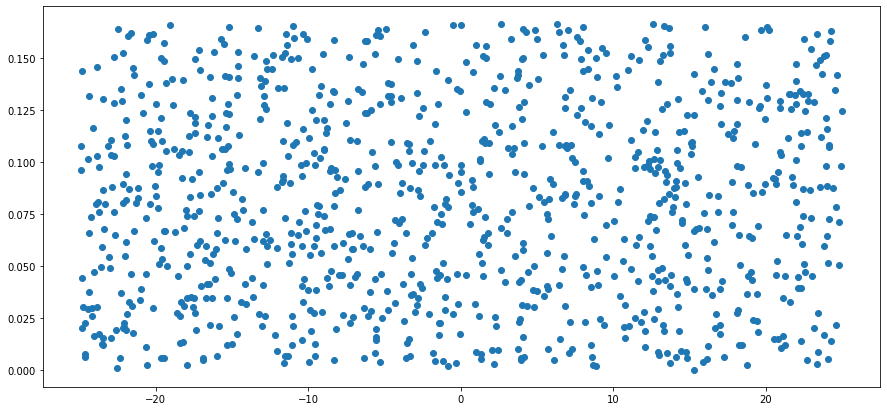

In [3]:
noisy = torch.rand(y_train.shape) /6.
plt.plot(x_train.numpy(), noisy.numpy(), 'o')

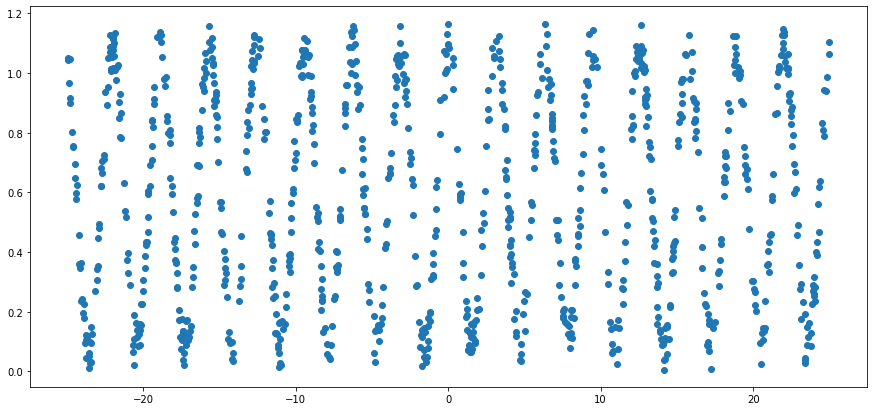

In [4]:
y_train = y_train + noisy
plt.plot(x_train.numpy(), y_train.numpy(), 'o')

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

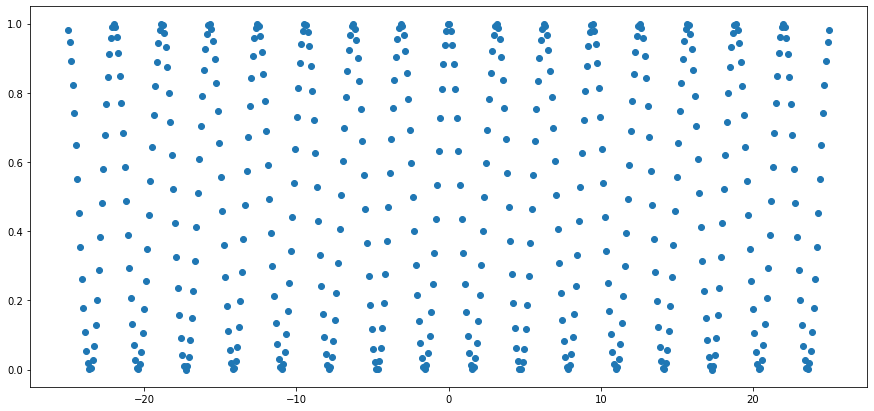

In [6]:
x_val = torch.linspace(-25, 25, 500)
y_val = torch.cos(x_val.data)**2
plt.plot(x_val.numpy(), y_val.numpy(), 'o')

In [7]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1).shape

torch.Size([500, 1])

In [9]:
class OurNet(torch.nn.Module):
    def __init__(self, n_hid_n):
        super(OurNet,self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hid_n)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hid_n, n_hid_n)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hid_n, n_hid_n)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(n_hid_n, n_hid_n)
        self.act4 = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(n_hid_n, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        return x

In [10]:
our_net = OurNet(100)

In [11]:
def predict(net, x, y):
    y_predict = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', c='g', label = 'what we want')
    plt.plot(x.numpy(), y_predict.data.numpy(), 'o', c='r', label = 'Prediction')
    plt.legend(loc='upper left')

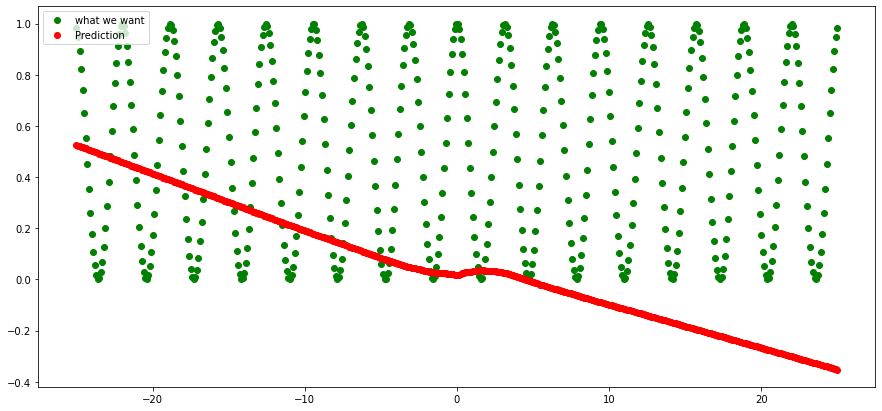

In [12]:
predict(our_net, x_val, y_val)

In [13]:
optimizer = torch.optim.Adam(our_net.parameters(), lr=0.001)

In [14]:
def loss(pred, true):
    sq = (pred-true)**2
    return sq.mean()

In [15]:
for epoch in range(9000):
    optimizer.zero_grad()
    
    y_pred = our_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    print(loss_val)
    
    loss_val.backward()
    optimizer.step()
    


tensor(0.4555, grad_fn=<MeanBackward0>)
tensor(0.2438, grad_fn=<MeanBackward0>)
tensor(0.2062, grad_fn=<MeanBackward0>)
tensor(0.2146, grad_fn=<MeanBackward0>)
tensor(0.2135, grad_fn=<MeanBackward0>)
tensor(0.2056, grad_fn=<MeanBackward0>)
tensor(0.1913, grad_fn=<MeanBackward0>)
tensor(0.1786, grad_fn=<MeanBackward0>)
tensor(0.1746, grad_fn=<MeanBackward0>)
tensor(0.1773, grad_fn=<MeanBackward0>)
tensor(0.1772, grad_fn=<MeanBackward0>)
tensor(0.1720, grad_fn=<MeanBackward0>)
tensor(0.1663, grad_fn=<MeanBackward0>)
tensor(0.1641, grad_fn=<MeanBackward0>)
tensor(0.1656, grad_fn=<MeanBackward0>)
tensor(0.1635, grad_fn=<MeanBackward0>)
tensor(0.1585, grad_fn=<MeanBackward0>)
tensor(0.1559, grad_fn=<MeanBackward0>)
tensor(0.1555, grad_fn=<MeanBackward0>)
tensor(0.1542, grad_fn=<MeanBackward0>)
tensor(0.1507, grad_fn=<MeanBackward0>)
tensor(0.1473, grad_fn=<MeanBackward0>)
tensor(0.1462, grad_fn=<MeanBackward0>)
tensor(0.1447, grad_fn=<MeanBackward0>)
tensor(0.1409, grad_fn=<MeanBackward0>)


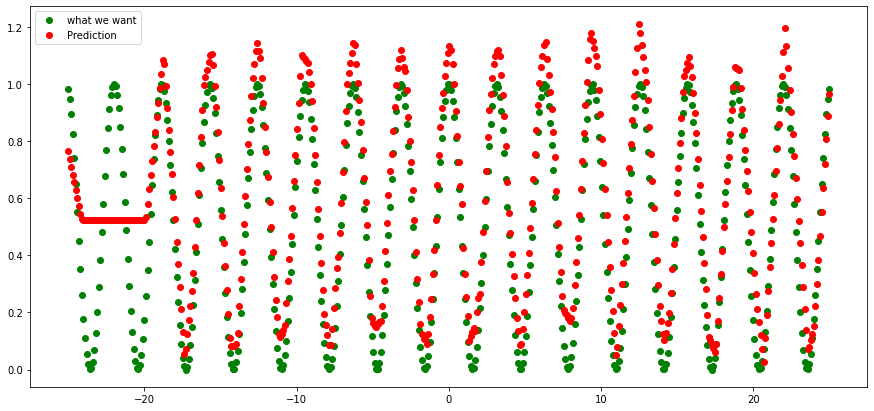

In [16]:
predict(our_net, x_val, y_val)